In [266]:
#Data Visualization
#Btech Computer Science Stream, January 2025
#week 6 - Data Exploration and Analysis - cereals dataset
# Name: Mohammed Ahsan Bagsaria , 240968484 , Date:20/02/2025

In [267]:
import pandas as pd
import numpy as np

Data Cleaning Part of week_5:

In [268]:
'''
2. For the CEREALS dataset, perform data preprocessing and
answer the following questions.
a. Create a table with the 5 number summary of all the numeric
attributes.
b. For each of the numeric attributes (proteins upto vitamins) ,
identify and replace all missing data(indicated with -1) with
the arithmetic mean of the attribute.
c. Create a table with the 5 number summary of all the numeric
attributes after treating missing values. Do you think the
strategy used in dealing with missing values was effective?
d. For each numeric attribute (proteins upto vitamins), identify
and replace all noisy data with the median of attribute.
e. Create a table with the 5 number summary of all the numeric
attributes after treating noisy values. Do you think the
strategy used in dealing with noisy values was effective? 
'''

ce = pd.read_excel('Cereals.xlsx')

#Part-a
print("Part-a:")
display(ce.describe()) #Used for better UI when printing the resultant table
print('\n===========================================================\n')

#Part-b
print("Part-b:")
ce.loc[:,'protein':'vitamins'] = ce.loc[:,'protein':'vitamins'].replace(-1,ce.loc[:,'protein':'vitamins'].mean()).astype(int)
display(ce)
print('\n===========================================================\n')

#Part-c
print("Part-c:")
display(ce.describe())
print('\n===========================================================\n')
#The strategy used above - Replacing missing data (-1) with arithmetic mean might be 
#efficient only if there are a few deviations in the outliers.
# If the data has a few values, example 20, where the range of values is to be around 13-19 (teenagers), 
#if an outlier has the value 130 or 1500, this method would be inefficient

#Part-d
print("Part-d:")
Q1 = ce.loc[:,'protein':'vitamins'].quantile(0.25)
Q3 = ce.loc[:,'protein':'vitamins'].quantile(0.75)
IQR = Q3 - Q1
for col in ce.loc[:, 'protein':'vitamins']:
    median_val = ce[col].median()  
    ce[col] = np.where((ce[col] < (Q1[col] - 1.5 * IQR[col])) | (ce[col] > (Q3[col] + 1.5 * IQR[col])),
                        median_val, ce[col]) 
ce.loc[:, 'protein':'vitamins'] = ce.loc[:, 'protein':'vitamins'].fillna(ce.loc[:, 'protein':'vitamins'].median(numeric_only=True)).astype(int)
display(ce)
print('\n===========================================================\n')

#Part-e
print("Part-e:")
display(ce.describe())
#This strategy of dealing with noisy values using the Interquartile Range method (IQR) is efficient since it helps maintain
#consistency and the right data. But if the extreme data points are genuine, such as perhaps looking at the 
#revenue of a company month wise, the gross revenue could shoot up by large amounts.
#Thus, this method needs to be used with caution.

Part-a:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912




Part-b:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,93,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.0,10.0,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193




Part-c:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.013158,14.894737,7.026316,96.131579,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.224071,3.765028,4.378656,66.689398,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.500000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912




Part-d:


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5.0,15.0,2.0,8.0,8.0,135.0,25.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1.0,260.0,1.0,7.0,5.0,90.0,25.0,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0.0,140.0,1.0,8.0,0.0,90.0,25.0,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2.0,200.0,1.0,14.0,8.0,93.0,25.0,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2.0,180.0,1.0,10.0,10.0,70.0,25.0,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1.0,250.0,0.0,21.0,3.0,60.0,25.0,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1.0,140.0,0.0,13.0,12.0,25.0,25.0,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1.0,230.0,3.0,17.0,3.0,115.0,25.0,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1.0,200.0,3.0,17.0,3.0,110.0,25.0,1,1.0,1.00,51.592193




Part-e:


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.381579,1.013158,181.381579,1.736842,14.894737,7.026316,85.736842,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.878895,1.013159,60.186370,1.526376,3.765028,4.378656,48.046746,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.000000,1.000000,180.000000,1.000000,14.500000,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.500000,1.500000,93.704912


Week_6 part questions 1-12:

In [269]:
# 1. How many cereals(unique brands) are there in the dataset?
print('The number of unique cereals in the dataset are:' , ce['name'].nunique())
print('The number of unique manufacturers in the dataset are:',ce['mfr'].nunique())

The number of unique cereals in the dataset are: 76
The number of unique manufacturers in the dataset are: 7


In [270]:
# 2. How many cereals are listed per manufacturer of the cereal?
print(ce.groupby('mfr')['name'].nunique())

mfr
A     1
G    22
K    23
N     5
P     9
Q     8
R     8
Name: name, dtype: int64


In [271]:
# 3. How many hot vs cold cereals?
print(ce.groupby('type')['name'].nunique())

type
C    73
H     3
Name: name, dtype: int64


In [272]:
# 4. Which is the best and worst cereal?
best = ce[ce['rating'] == ce['rating'].max()][['mfr','name','rating']]
worst = ce[ce['rating'] == ce['rating'].min()][['mfr','name','rating']]
print('The best cereal is:\n')
display(best)
print('\n')
print('The worst cereal is:\n')
display(worst)
#Thus the best and worst cereals can be judged by their rating

The best cereal is:



,mfr,name,rating
2,K,All-Bran_with_Extra_Fiber,93.704912




The worst cereal is:



,mfr,name,rating
9,Q,Cap'n'Crunch,18.042851


The average rating of hot cereals is:  56.73770833333334
The average rating of cold cereals is:  41.73483816438357




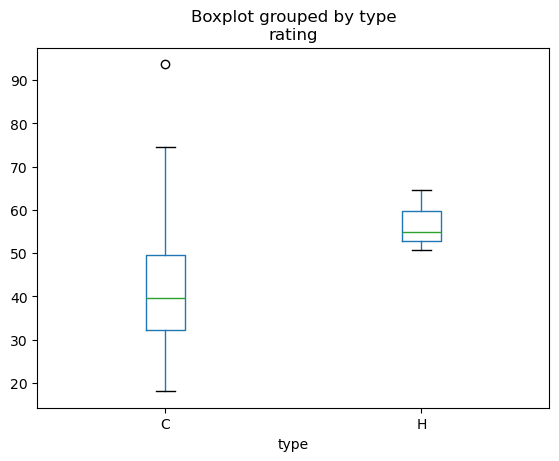

In [273]:
# 5. Compare the rating for hot vs cold cereals. Which do people prefer?
ce.boxplot(column='rating',by = 'type',grid = False)
ce_hot = ce[ce['type'] == 'H']['rating']
ce_cold = ce[ce['type']=='C']['rating']
print('The average rating of hot cereals is: ',ce_hot.mean())
print('The average rating of cold cereals is: ', ce_cold.mean())
print('\n')
# Based on the mean values, it can be inferred that people prefer hot over cold cereals
# Also, from the box plot, the ratings of hot cereals are higher than the cold cereals and are less spread over the y-axis
# In Conclusion, we can say that hot cereals are in general, more preferred than cold cereals with reference to this dataset.
#But we also need to keep in mind that there are 73 cold cereals vs just 3 hot cereals.

In [274]:
# 6. Which cereals have the highest fiber and lowest sugar?
req = ce[ce['sugars'] <= 5].sort_values(by=['fiber', 'sugars'], ascending=[False, True])
display(req.head(5)[['name', 'sugars', 'fiber']])
#These 5 cereals have the nutritional values as described in the question

,name,sugars,fiber
8,Bran_Flakes,5.0,5.0
63,Shredded_Wheat_'n'Bran,0.0,4.0
62,Shredded_Wheat,0.0,3.0
64,Shredded_Wheat_spoon_size,0.0,3.0
49,Nutri-grain_Wheat,2.0,3.0


In [275]:
# 7. Which Cereals that have more than 3 grams of protein?
good_pr = ce[ce['protein']>3]
display(good_pr[['name']])

,name
1,All-Bran
2,All-Bran_with_Extra_Fiber
40,Life
42,Maypo
43,"Muesli_Raisins,_Dates,_&amp;_Almonds"
44,"Muesli_Raisins,_Peaches,_&amp;_Pecans"
55,Quaker_Oat_Squares


Number of cereals grouped by shelf number:


shelf
1    20
2    21
3    35
Name: name, dtype: int64

,count,mean,std,min,25%,50%,75%,max
shelf,,,,,,,,
1,20.0,46.145439,13.558632,28.742414,35.953780,43.931128,51.019342,74.472949
2,21.0,34.972827,13.952962,18.042851,23.804043,31.230054,39.259197,64.533816
3,35.0,44.557662,12.529443,28.592785,36.781122,40.692320,50.794386,93.704912


<Axes: title={'center': 'rating'}, xlabel='shelf'>

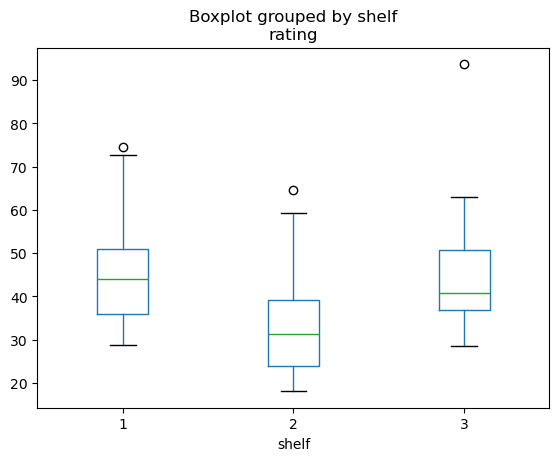

In [276]:
# 8. Tabulate and visualize Cereals by display Shelf.
print('Number of cereals grouped by shelf number:')
display(ce.groupby('shelf')['name'].nunique())
display(ce.groupby('shelf')['rating'].describe())
ce.boxplot(column = 'rating',by = 'shelf',grid = False)

Number of cereals grouped by mfr:
 mfr
K    23
G    22
P     9
Q     8
R     8
N     5
A     1
Name: count, dtype: int64 

Mean of sugar contents for different mfrs:
 mfr
A    3.000000
G    7.954545
K    7.565217
N    1.000000
P    8.777778
Q    6.125000
R    6.125000
Name: sugars, dtype: float64


<Axes: title={'center': 'sugars'}, xlabel='mfr'>

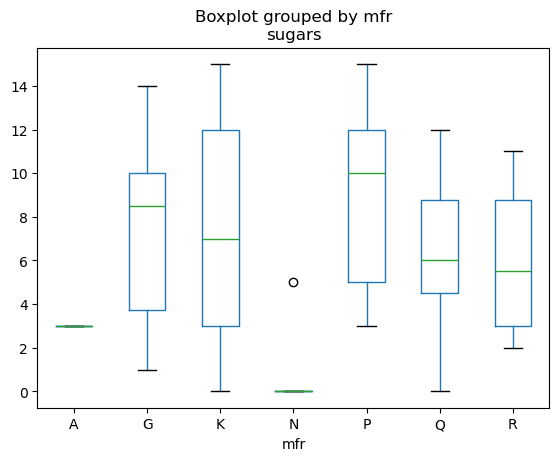

In [277]:
# 9. How does the sugar content vary across different brands?
print('Number of cereals grouped by mfr:\n',ce['mfr'].value_counts(),'\n')
print('Mean of sugar contents for different mfrs:\n',ce.groupby('mfr')['sugars'].mean())
ce.boxplot(column = 'sugars',by = 'mfr',grid = False)
# Thus, the trends in the sugar ratings across different brands can be seen as below
# The highest (average sugar content) being for P and the least being for N.

In [278]:
# 10. What is the average calories in cereals per manufacturer?
mfg = ce.groupby('mfr')
print(mfg['calories'].mean())

mfr
A    100.000000
G    111.363636
K    108.695652
N     90.000000
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64


In [279]:
# 11. What is the average nutritional content (calories, sugars, protein, fiber, etc.) across all cereals?
ce.describe().loc[['mean']]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mean,107.368421,2.381579,1.013158,181.381579,1.736842,14.894737,7.026316,85.736842,25.0,2.197368,1.03,0.8275,42.327057


Correlation factor:  0.5751882017525517


<Axes: title={'center': 'Relation between Sugars and Calories'}, xlabel='sugars', ylabel='calories'>

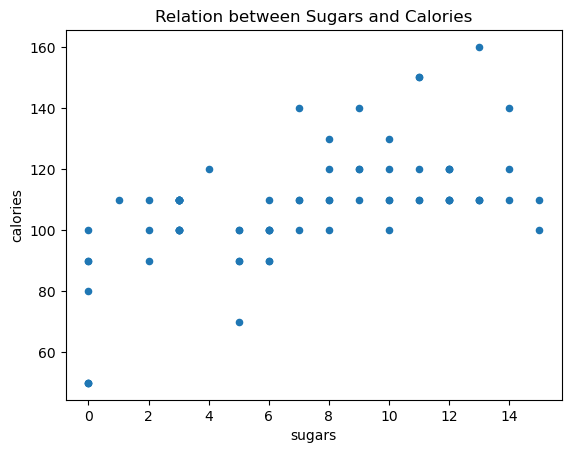

In [280]:
# 12. What is the relationship between sugar and calories?
print('Correlation factor: ',ce['sugars'].corr(ce['calories']))
ce.plot.scatter(x = 'sugars',y = 'calories',title = 'Relation between Sugars and Calories')
# The results convey that sugars impact the amount of calories in cereals. 
#But, from the correlation factor and the scatter plot, it can be stated that they are not completely correlated,
# i.e.; the amount of calories is impacted by other factors such contents of fats, sodium, etc.

Correlation factor: -0.7758554384298781


<Axes: title={'center': 'Relation between sugar content and rating'}, xlabel='sugars', ylabel='rating'>

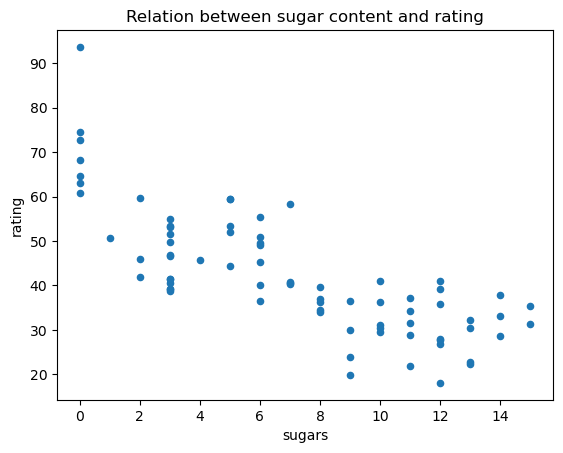

In [281]:
# 13. How does the sugar content compare in cereals with high vs. low ratings?
print("Correlation factor:" , ce['rating'].corr(ce['sugars']))
ce.plot.scatter(y= 'rating' , x= 'sugars',grid = False,title = 'Relation between sugar content and rating')
# The results clearly convey that the ratings show a decreasing trend as the sugar content increases.
# This shows that ratings take into account the sugar content of the cereals. 

In [282]:
# 14. Do cereals marketed as "healthy" (e.g., high fiber, low sugar) tend to have higher ratings?
healthy = ce[(ce['sugars']<=5) & (ce['fiber']>=3) & (ce['protein']>=1) & (ce['vitamins']>=25)]
unhealthy = ce[~(ce['sugars']<=5) & (ce['fiber']>=3)& (ce['protein']>=1) & (ce['vitamins']>=25)]
display(healthy['rating'].mean())
display(unhealthy['rating'].mean())
#Thus, through the results, we can conlcude that "Yes, the ratings of cereals marketed healthy have higher ratings!"

57.26078050000001

39.818464999999996

Correlation:  0.001973020750965257


<Axes: title={'center': 'rating'}, xlabel='shelf'>

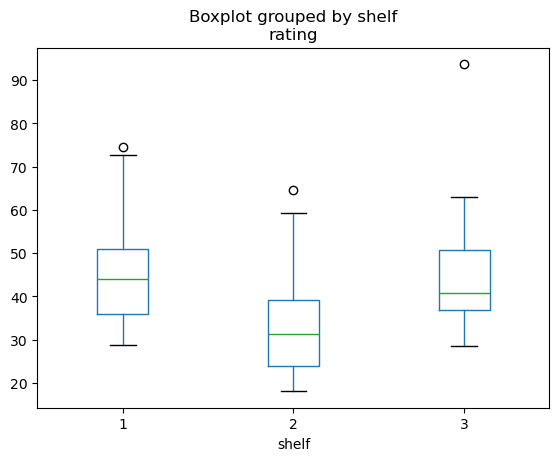

In [283]:
# 15. Is there a relationship between rating and display shelf?
print('Correlation: ' , ce['rating'].corr(ce['shelf']))
ce.boxplot( column = 'rating',by='shelf',grid = False)
# The correlation factor is very weak and the boxplot shows a wide range of ratings.
# Thus, through the correlation factor and the boxplot, we can conclude that there isnt a strong relationship 
# between the rating and shelves the cereals are placed on